# CNN in small dataset with augmantation to fight against overfitting
* Jikhan Jeong
* ref: https://www.manning.com/books/deep-learning-with-python
* CNN small dataset with data augmantation
* p152

In [1]:
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
import os, shutil

In [5]:
original_dataset_dir = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats'

In [6]:
original_dataset_dir_train = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats\\train'

In [7]:
original_dataset_dir_test = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats\\test'

In [8]:
small_data_dir = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small'

In [9]:
train_dir = os.path.join(small_data_dir,'train')

In [10]:
validation_dir = os.path.join(small_data_dir, 'validation')

In [11]:
test_dir = os.path.join(small_data_dir, 'test')

In [12]:
train_cats_dir = os.path.join(train_dir,'cats')

In [13]:
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [14]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [15]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
test_cats_dir = os.path.join(test_dir, 'cats')

In [45]:
test_dogs_dir = os.path.join(test_dir, 'dogs')

# data augmantation via ImageDataGenerator

In [18]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [21]:
type(fnames)

list

In [22]:
len(fnames)

1000

In [35]:
# 1 image to augmant
img_path = fnames[1]

In [36]:
img = image.load_img(img_path, target_size=(150, 150))

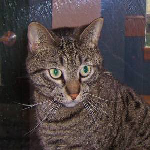

In [38]:
img

* making image to numpy array

In [40]:
x = image.img_to_array(img)

In [41]:
x

array([[[ 39.,  44.,  40.],
        [ 41.,  45.,  46.],
        [ 41.,  44.,  49.],
        ...,
        [186., 184., 163.],
        [207., 204., 171.],
        [201., 199., 161.]],

       [[ 40.,  45.,  41.],
        [ 40.,  44.,  45.],
        [ 40.,  43.,  48.],
        ...,
        [186., 183., 164.],
        [199., 196., 165.],
        [198., 195., 160.]],

       [[ 37.,  42.,  38.],
        [ 34.,  38.,  39.],
        [ 33.,  36.,  41.],
        ...,
        [180., 177., 160.],
        [195., 189., 163.],
        [206., 201., 169.]],

       ...,

       [[ 24.,  22.,  23.],
        [ 20.,  18.,  19.],
        [ 20.,  18.,  19.],
        ...,
        [ 50.,  35.,  30.],
        [ 51.,  38.,  32.],
        [ 43.,  32.,  26.]],

       [[ 30.,  28.,  29.],
        [ 23.,  21.,  22.],
        [ 22.,  20.,  21.],
        ...,
        [ 31.,  16.,  11.],
        [ 36.,  23.,  17.],
        [ 57.,  46.,  40.]],

       [[ 29.,  27.,  28.],
        [ 21.,  19.,  20.],
        [ 20.,  

In [43]:
type(x)

numpy.ndarray

In [44]:
x.shape

(150, 150, 3)

* reshpae and generates images

In [54]:
import matplotlib.pyplot as plt

In [57]:
from keras.preprocessing.image import ImageDataGenerator

In [58]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

In [46]:
x = x.reshape((1,) + x.shape)

In [47]:
x.shape

(1, 150, 150, 3)

In [51]:
i = 0

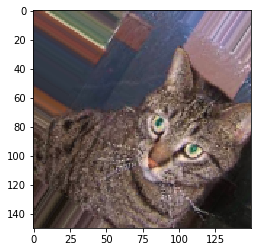

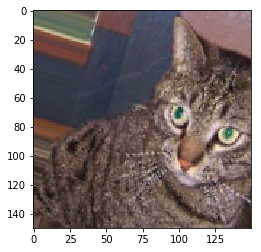

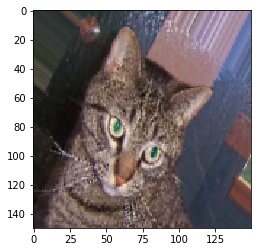

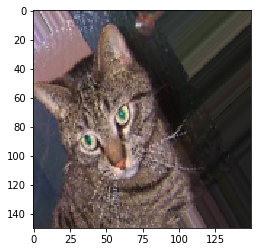

In [61]:
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Building a model

In [64]:
from keras import layers
from keras import models

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Model Compile

In [72]:
from keras import optimizers

In [73]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# Training the convnet using data-augmentation generators
* Train data set = Train(sub) + Validation
* Train(sub) is supposed to be augmented
* Validation is not supposed to be augmented

In [74]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,) # with augmentation

In [75]:
test_datagen = ImageDataGenerator(rescale=1./255) # Validation data don't need to be augmented # without augmentation

In [79]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [80]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [82]:

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=10, # this program run in notebook so just setting in 10 epoch, if I will use it HPC it will be bigger than this
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/10
100/100 [==============================] - 329s 3s/step - loss: 0.5961 - acc: 0.6728 - val_loss: 0.8373 - val_acc: 0.5533
Epoch 2/10
100/100 [==============================] - 320s 3s/step - loss: 0.5960 - acc: 0.6831 - val_loss: 0.5660 - val_acc: 0.6933
Epoch 3/10
100/100 [==============================] - 323s 3s/step - loss: 0.5892 - acc: 0.6900 - val_loss: 0.5490 - val_acc: 0.7030
Epoch 4/10
100/100 [==============================] - 313s 3s/step - loss: 0.5763 - acc: 0.6987 - val_loss: 0.5420 - val_acc: 0.7210
Epoch 5/10
100/100 [==============================] - 333s 3s/step - loss: 0.5719 - acc: 0.6966 - val_loss: 0.5762 - val_acc: 0.6872
Epoch 6/10
100/100 [==============================] - 349s 3s/step - loss: 0.5740 - acc: 0.6978 - val_loss: 0.5345 - val_acc: 0.7236
Epoch 7/10
100/100 [==============================] - 336s 3s/step - loss: 0.5571 - acc: 0.7053 - val_loss: 0.5529 - val_acc: 0.7126
Epoch 8/10
100/100 [==============================] - 356s 4s/step - 

In [83]:
model.save('cats_and_dogs_small_2.h5')

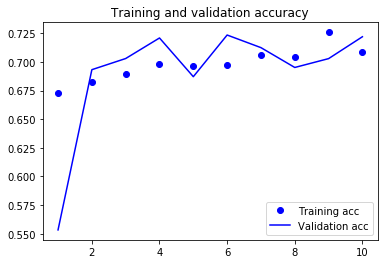

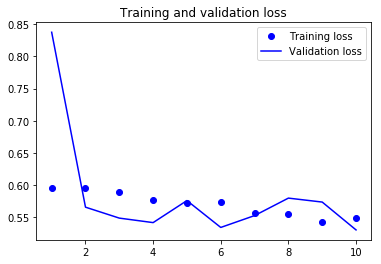

In [84]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()